In this notebook, the task is to prepare the variables measuring government policy and ideology.
The variables of interest are EPS (environmental policy stringency) and GOV (the percentage of government controlled by right-wing parties)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
GOV = pd.read_excel('gov_ideology.xlsx')
GOV.head()
GOV.dtypes

year            int64
country        object
countryn        int64
iso            object
iso3n           int64
               ...   
pop15_64      float64
pop65         float64
elderly       float64
year_13         int64
country_13     object
Length: 341, dtype: object

In [3]:
#print unique values in country
GOV_country = GOV['country'].unique()
print(GOV_country)

['Australia' 'Austria' 'Belgium' 'Bulgaria' 'Canada' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'United Kingdom' 'USA']


In [4]:
#EU and EFTA country list

# EU countries (27)
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg",
    "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia",
    "Slovenia", "Spain", "Sweden"
]

# EFTA countries (4)
efta_countries = ["Iceland", "Liechtenstein", "Norway", "Switzerland"]

# Combined list
country_list = eu_countries + efta_countries

In [5]:
# change Czech Republic to Czechia in GOV
GOV['country'] = GOV['country'].replace('Czech Republic', 'Czechia')

In [6]:
#identify countries that are in country_list but not in
missing_countries = set(country_list) - set(GOV['country'])
print(missing_countries)

{'Liechtenstein'}


In [7]:
#select columns year, country, gov_right1, gov_cent1, gov_left1
GOV = GOV[['year', 'country', 'gov_right1', 'gov_cent1', 'gov_left1']]

#select rows where the country is in in the country_list
GOV = GOV[GOV['country'].isin(country_list)]

#select rows where year is larger than 1990
GOV = GOV[GOV['year'] >= 1990]

GOV.head(10)

,year,country,gov_right1,gov_cent1,gov_left1
94,1990,Austria,0.0,46.71,46.71
95,1991,Austria,0.0,47.06,47.06
96,1992,Austria,0.0,43.75,50.00
97,1993,Austria,0.0,43.75,50.00
98,1994,Austria,0.0,43.75,50.00
99,1995,Austria,0.0,43.75,50.00
100,1996,Austria,0.0,43.03,50.00
101,1997,Austria,0.0,45.91,46.44
102,1998,Austria,0.0,46.15,46.15
103,1999,Austria,0.0,46.15,46.15


In [ ]:
# compute the average of gov_right1, gov_cent1, gov_left1 each year across all countries
df_gov_avg = GOV.groupby('year').agg({
    'gov_right1': 'mean',
    'gov_cent1': 'mean',
    'gov_left1': 'mean'
}).reset_index()


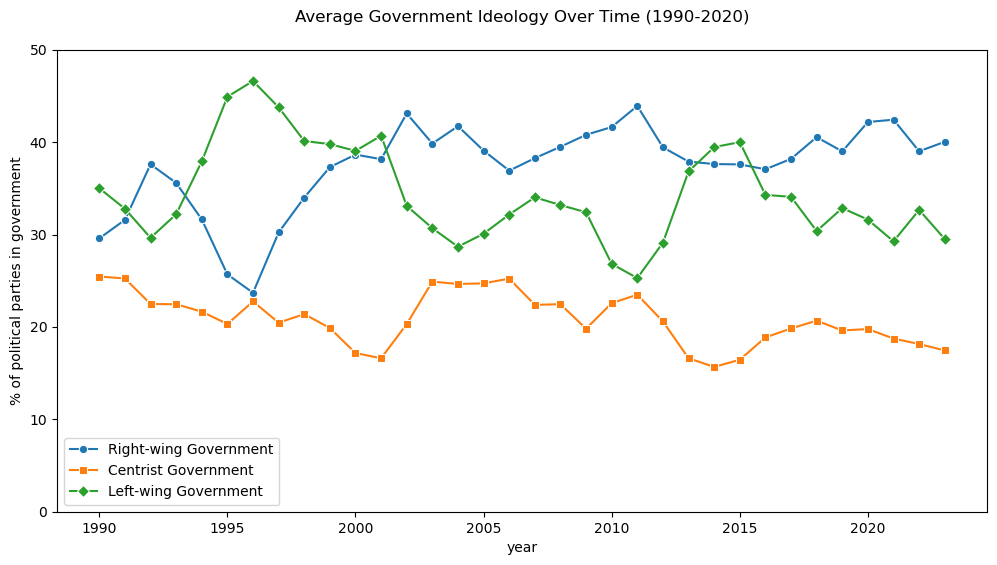

In [19]:
#plot the average of gov_right1, gov_cent1, gov_left1 over time

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gov_avg, x='year', y='gov_right1', label='Right-wing Government', marker='o')
sns.lineplot(data=df_gov_avg, x='year', y='gov_cent1', label='Centrist Government', marker='s')
sns.lineplot(data=df_gov_avg, x='year', y='gov_left1', label='Left-wing Government', marker='D')
plt.xticks(rotation=0)
plt.ylim(0, 50)
plt.title('Average Government Ideology Over Time (1990-2020)', pad=20)
plt.ylabel('% of political parties in government')
plt.legend()

plt.savefig('gov_ideology_over_time.png', bbox_inches='tight', dpi=600)  
plt.show()

In [21]:
EPS = pd.read_excel('eps.xlsx', sheet_name= 'EPS')
EPS.head()

,Time period,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Austria,1.888889,1.888889,1.888889,2.194444,2.194444,2.305556,2.527778,2.250000,2.666667,...,3.055556,2.944444,3.277778,3.111111,2.944444,2.944444,2.944444,3.083333,3.138889,3.305556
1,Belgium,1.555556,1.555556,1.611111,1.555556,2.472222,2.583333,2.638889,2.305556,2.638889,...,2.944444,3.055556,2.944444,2.944444,2.833333,2.888889,2.944444,3.000000,3.222222,3.444444
2,Czechia,1.416667,1.416667,2.166667,2.416667,2.416667,2.416667,2.722222,2.638889,3.083333,...,3.111111,3.250000,3.000000,2.500000,2.555556,2.722222,2.722222,2.888889,3.111111,2.944444
3,Denmark,2.000000,2.000000,1.888889,2.638889,2.805556,3.027778,3.138889,3.138889,3.194444,...,4.222222,3.888889,4.055555,4.111111,4.027778,3.944444,4.027778,3.777778,3.666667,3.722222
4,Estonia,1.500000,2.000000,2.000000,2.166667,2.916667,3.194444,3.305556,3.138889,3.472222,...,3.055556,2.527778,3.611111,3.722222,3.722222,3.722222,3.777778,3.333333,3.166667,3.277778


In [22]:
#name first column 'country
EPS.rename(columns={'Time period': 'country'}, inplace=True)
EPS.head()

#melt the wide format to long format
EPS = EPS.melt(id_vars=['country'], var_name='year', value_name='EPS')
EPS.head()

,country,year,EPS
0,Austria,2000,1.888889
1,Belgium,2000,1.555556
2,Czechia,2000,1.416667
3,Denmark,2000,2.000000
4,Estonia,2000,1.500000


In [23]:
EPS.info()

#change year datatype to int
EPS['year'] = EPS['year'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  504 non-null    object 
 1   year     504 non-null    object 
 2   EPS      504 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.9+ KB


In [37]:
# change country name "Slovak Republic" to "Slovakia"
EPS['country'] = EPS['country'].replace('Slovak Republic', 'Slovakia')

In [33]:
#compute the average EPS for each year across all countries
df_eps_avg = EPS.groupby('year').agg({
    'EPS': 'mean'
}).reset_index()

print(df_eps_avg)

    year       EPS
0   2000  1.469907
1   2001  1.519676
2   2002  1.722222
3   2003  1.898148
4   2004  2.053241
5   2005  2.331019
6   2006  2.519676
7   2007  2.453704
8   2008  2.734954
9   2009  2.945602
10  2010  3.019676
11  2011  3.142361
12  2012  3.043981
13  2013  3.103009
14  2014  3.123843
15  2015  3.122685
16  2016  3.121528
17  2017  3.121528
18  2018  3.173611
19  2019  3.225694
20  2020  3.329861


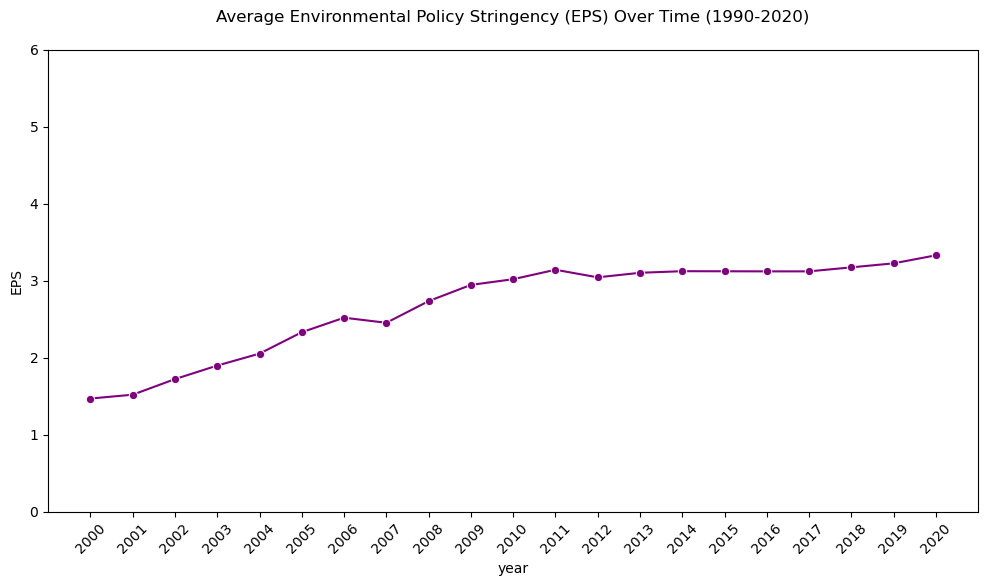

In [60]:
#plot the average EPS over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_eps_avg, x='year', y='EPS', marker='o', color='purple')
plt.xticks(df_eps_avg['year'], rotation=45)
plt.ylim(0, 6)
plt.title('Average Environmental Policy Stringency (EPS) Over Time (1990-2020)', pad=20)
plt.ylabel('EPS')

plt.savefig('eps_over_time.png', bbox_inches='tight', dpi=600)
plt.show()

In [38]:
# compute the average of EPS for each country across all years
df_eps_country_avg = EPS.groupby('country').agg({
    'EPS': 'mean'
}).reset_index()

print(df_eps_country_avg.sort_values(by='EPS', ascending=False))

        country       EPS
6        France  3.453704
3       Denmark  3.370370
21       Sweden  3.322751
22  Switzerland  3.263227
5       Finland  3.240741
13   Luxembourg  3.167989
15       Norway  3.128307
12        Italy  3.128307
4       Estonia  3.079365
7       Germany  2.904762
14  Netherlands  2.850529
9       Hungary  2.748677
0       Austria  2.694444
2       Czechia  2.657407
1       Belgium  2.588624
16       Poland  2.451058
17     Portugal  2.382275
11      Ireland  2.341270
8        Greece  2.297619
20        Spain  2.273810
19     Slovenia  2.214286
18     Slovakia  2.211640
23      Türkiye  1.940476
10      Iceland  0.489418


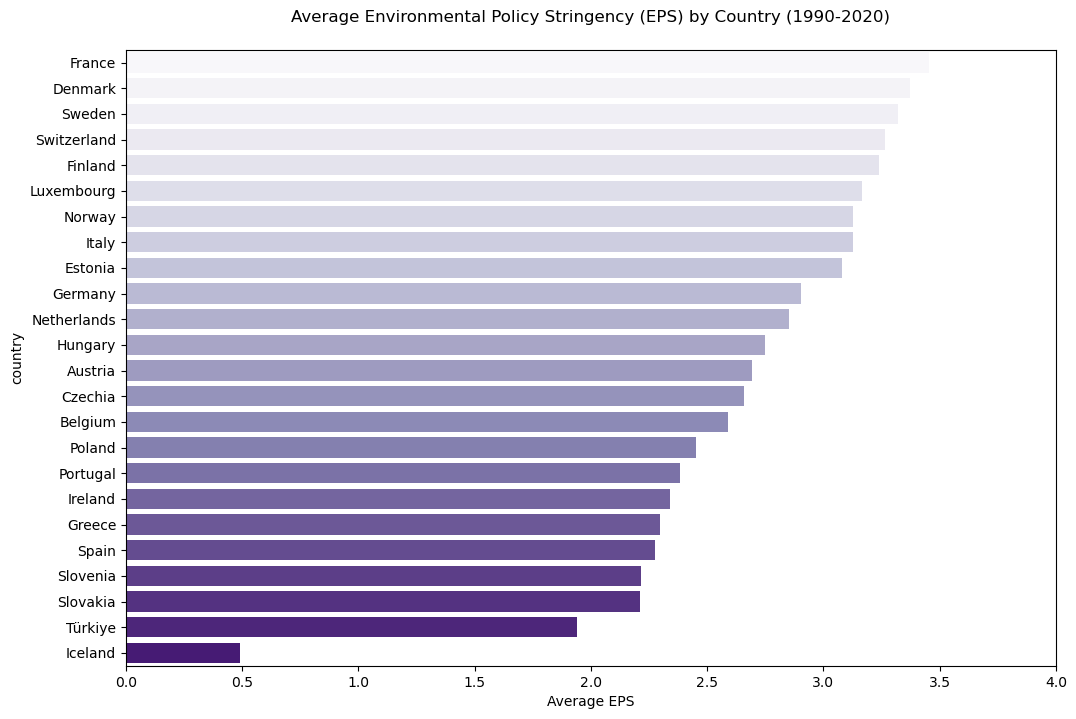

In [59]:
#plot df_eps_country_avg
plt.figure(figsize=(12, 8))
sns.barplot(data=df_eps_country_avg.sort_values(by='EPS', ascending=False), x='EPS', y='country', 
            hue = 'country', legend = False, palette='Purples')
plt.title('Average Environmental Policy Stringency (EPS) by Country (1990-2020)', pad=20)
plt.xlabel('Average EPS')
plt.xlim(0, 4.0)

plt.savefig('eps_by_country.png', bbox_inches='tight', dpi=600)
plt.show()
